In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/global_aqi.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (20968, 4)


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [11]:
df = df.dropna()
print("After cleaning:", df.shape)


After cleaning: (20968, 4)


          AQI Value
count  20968.000000
mean      62.691959
std       49.845802
min        1.000000
25%       29.000000
50%       52.000000
75%       82.000000
max      963.000000


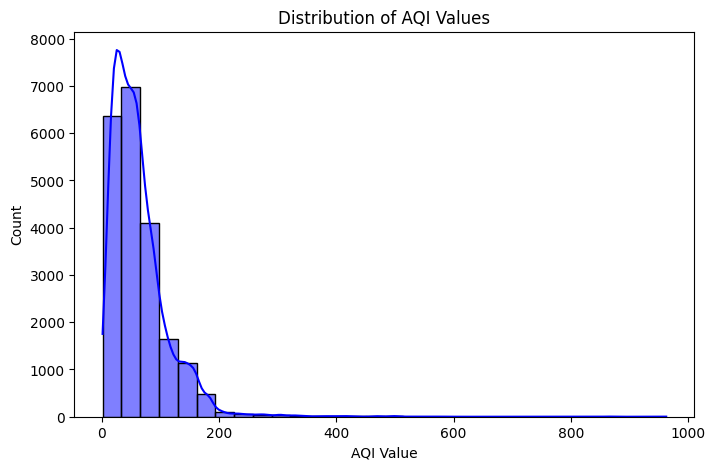

/tmp/ipython-input-2285045769.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Status", data=df, order=df['Status'].value_counts().index, palette="Set2")


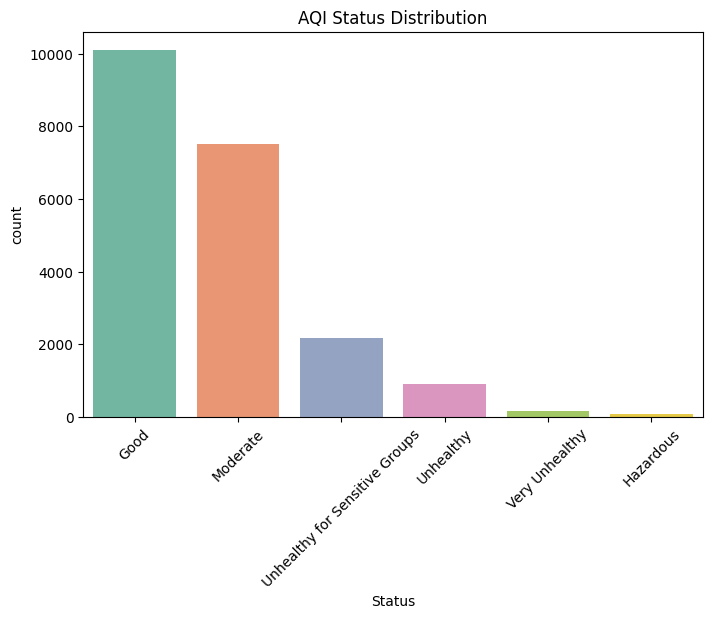

/tmp/ipython-input-2285045769.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


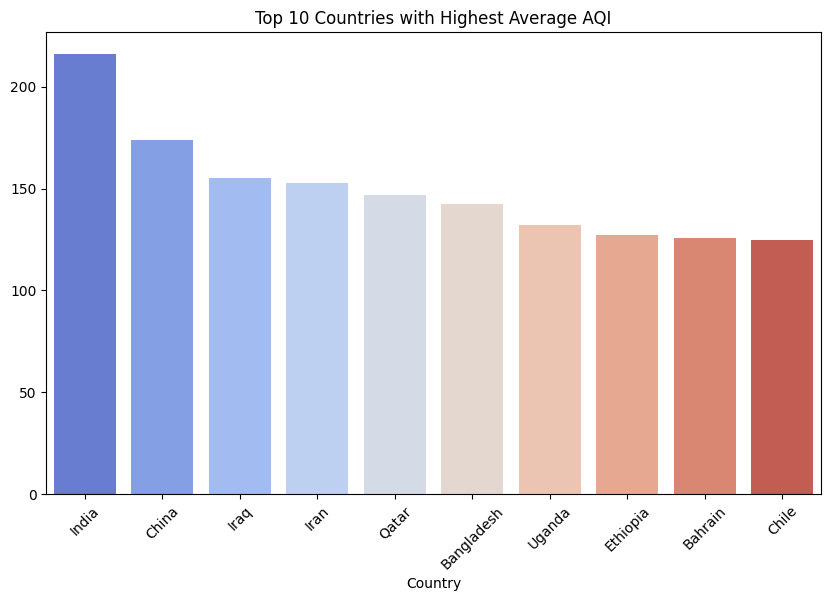

In [12]:
print(df.describe())

plt.figure(figsize=(8,5))
sns.histplot(df['AQI Value'], bins=30, kde=True, color="blue")
plt.title("Distribution of AQI Values")
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x="Status", data=df, order=df['Status'].value_counts().index, palette="Set2")
plt.title("AQI Status Distribution")
plt.xticks(rotation=45)
plt.show()

top_countries = df.groupby("Country")["AQI Value"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries with Highest Average AQI")
plt.xticks(rotation=45)
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_status = LabelEncoder()

df['Country_encoded'] = le_country.fit_transform(df['Country'])
df['Status_encoded'] = le_status.fit_transform(df['Status'])

X = df[['Country_encoded', 'Status_encoded']]
y = df['AQI Value']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (16774, 2)
Testing samples: (4194, 2)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 900.2070783651353
R2 Score: 0.6138652112893828
